In [1]:
from math import sin, sqrt, exp, cos
import matplotlib.pyplot as plt
from rk8 import rk_error_control_perfect_first_step

In [2]:
def create_t_eval(start, end, num_points = 100):
    res = [start]
    h = (end - start)/(num_points - 1)

    for _ in range(num_points - 1):
        res.append(
            res[-1] + h
        )
    return res

In [3]:
def experiment(model, y0, t_span, solution):
    t_eval = create_t_eval(t_span[0], t_span[1])
    tol = 1e-6
    (res, sol, first_deriv, error_samplings, ratios, monitor) = rk_error_control_perfect_first_step(model, t_span, y0[0], tol, solution)
    # (res, sol, first_deriv, error_samplings) = rk_error_control_static_alpha_beta(model, t_span, y0[0], tol, solution)
    print("integration complete")

    # ====================================== figure of rk6 vs rk6_interps vs rk45
    # plt.figure()
    xs = [x[0] for x in res]
    # ys = [x[1] for x in res]
    # plt.plot(xs, ys, label="rk6")

    # plots of where the end of the steps occured to look at the interp
    # for this_x in xs:
    #     plt.axvline(x=this_x) 

    computed_solutions = [sol(x) for x in t_eval]
    # plt.plot(t_eval, computed_solutions, label="computed solution")

    actual_solutions = solution(t_eval)
    # plt.plot(t_eval, actual_solutions, label="actual solution")

    # # removed rk45 plt.title("solution vs rk45 vs rk6 vs rk6_interpolated")
    # plt.title(f"actual solution vs interpolated solution tol={tol}")
    # plt.xlabel("t")
    # plt.ylabel('y')
    # plt.legend(loc="upper right")
    # plt.show()
    # ====================================== end figure of rk6 vs rk6_interps vs rk45

    # ====================================== global error
    plt.figure()
    error = [abs(computed_solution - actual_solution) for (computed_solution, actual_solution) in zip(computed_solutions, actual_solutions)]
    # for this_x in xs:
    #     plt.axvline(x=this_x) 
    plt.plot(t_eval, error, label="global error")
    # plt.title(f"global error for tol={tol}")
    plt.xlabel("t")
    plt.ylabel("error")
    plt.legend(loc="upper right")
    plt.show()
    # ====================================== end of global error

    
    plt.figure()
    end_of_steps = [r[0] for r in ratios]
    ratios_at_end_of_steps = [r[1] for r in ratios]
    plt.plot(end_of_steps, ratios_at_end_of_steps)
    plt.axhline(y=1, color="red")
    plt.xlabel("t")
    plt.ylabel("ratio")
    # plt.title(f"error_estimate/exact_error at end of steps for tol={tol}")
    plt.show()

    for (x, y) in res:
        print(abs(y - solution([ x ])[0]))

    # # shape of errors - graphs
    # plt.figure()
    # for (x_i, x_i_plus_1, hb) in error_samplings:
    #     num_points = 100
    #     pts_to_sample = create_t_eval(x_i, x_i_plus_1, num_points)
    #     errors = []
    #     for i, pt in enumerate(pts_to_sample):
    #         y = solution([pt])[0]
    #         hb_eval = hb.eval(pt)
    #         error = abs(hb_eval - y)
    #         errors.append( error )

    #         # # print the error at the extremities
    #         # if i == 0:
    #         #     interpolation_error = hb_eval - hb.y_i
    #         #     print("error=", error, "interpolation_error=", interpolation_error)

    #         # if i == len(pts_to_sample) - 1:
    #         #     interpolation_error = hb_eval - hb.y_i_plus_1
    #         #     print("error=", error, "interpolation_error=", interpolation_error)

    #     maximum_error = max(errors)
    #     scaled_errors = [error / (maximum_error) for error in errors]

    #     # str_x_i = "{:.3f}".format(x_i)
    #     # str_x_i_plus_1 = "{:.3f}".format(x_i_plus_1)
    #     x_axis = [i/(num_points - 1) for i in range(num_points)]
    #     plt.plot(x_axis, scaled_errors, label=f"x_{str(x_i)}_{str(x_i_plus_1)}")
    # plt.title("plot of shape of errors")
    # plt.xlabel("step scaled between 0 and 1")
    # plt.ylabel('scaled error')
    # # plt.legend()
    # plt.show()

    # # ====================================== figure of satisfying global defect
    # actual_f_evals = [model(x, solution([x])[0])[0] for x in t_eval]
    # hb_prime_evals = [first_deriv(x) for x in t_eval]
    # plt.figure()
    # plt.plot(t_eval, actual_f_evals)
    # plt.plot(t_eval, hb_prime_evals)
    # plt.title(f"first derivative for tol={tol}")
    # plt.show()

    # defects = [abs(actual_f_eval - hb_prime_eval) for (actual_f_eval, hb_prime_eval) in zip(actual_f_evals, hb_prime_evals)]
    # plt.figure()
    # plt.plot(t_eval, defects)
    # plt.title(f"global defect for tol={tol}")
    # plt.show()
    
    # # ====================================== end figure of satisfying global defect

    # # ====================================== figure of defect shape

    # minimum_step_size = 0.01
    # defects_small_steps = []
    # plt.figure()
    # for (x_i_minus_1, x_i, x_i_plus_1, hb) in derivs:
    #     num_points = 100
    #     pts_to_sample = create_t_eval(x_i, x_i_plus_1, num_points)
    #     defects = []
    #     for pt in pts_to_sample:
    #         y = solution([pt])[0]
    #         f_eval  = model(pt, y)[0]
    #         hb_prime_eval = hb.prime(pt)
    #         defects.append( abs(hb_prime_eval - f_eval) )
    #     maximum_defect = max(defects)
    #     # minimum_defect = min(defects)
    #     # plot_vals = [(defect - minimum_defect) / (maximum_defect - minimum_defect) for defect in defects]
    #     plot_vals = [ defect/ maximum_defect for defect in defects]
    #     #plt.plot(xs, defects, label=f"x_{str(x_i_minus_1)}_{str(x_i_plus_1)}")
    #     x_axis = [i/(num_points - 1) for i in range(num_points)]

    #     if (x_i_plus_1 - x_i < minimum_step_size):
    #         defects_small_steps.append([x_axis, plot_vals])
    #         continue
    #     plt.plot(x_axis, plot_vals, label=f"x_{str(x_i_minus_1)}_{str(x_i_plus_1)}")
    # plt.title("plot of defects")
    # plt.xlabel("x_i to x_i_plus_1")
    # plt.ylabel('defect/(max_defect on x_i to x_i_plus_1)')
    # # plt.legend()
    # plt.show()
    # # ====================================== end figure of defect

    # # ====================================== defects on small steps
    # plt.figure()
    # for [x_axis, plot_vals] in defects_small_steps:
    #     plt.plot(x_axis, plot_vals)
    # plt.title("plot of defects on small step sizes")
    # plt.xlabel("x_i to x_i_plus_1")
    # plt.ylabel('defect/(max_defect on x_i to x_i_plus_1)')
    # plt.show()

tolerance= 1e-06
Monitor8
alpha values [0.9999999999999998, 1.0, 0.4999999999999999, 0.5000000000000003, 0.5]
beta values [1.0000000000000002, 2.0000000000000004, 2.0, 1.999999999999999, 1.0]
n_steps 14
n_successful_steps 12


Monitor10
alpha values [0.9999999999999994, 1.9999999999999984, 2.0000000000000004, 2.0, 1.0000000000000007, 1.0, 1.9999999999999978]
beta values [1.9999999999999996, 2.0, 2.0000000000000013, 3.9999999999999956, 4.000000000000001, 4.0, 1.9999999999999978]
n_steps 0
n_successful_steps 0

integration complete


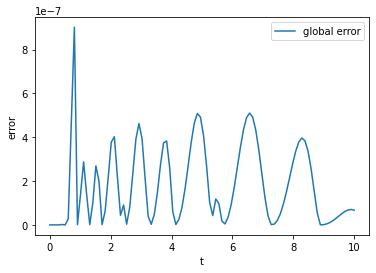

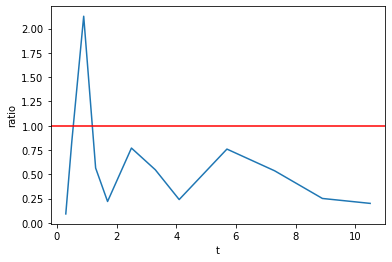

0.0
0.0
0.0
4.440892098500626e-16
5.861977570020827e-14
8.508860283029662e-12
7.26729787459135e-12
5.8510973843795e-12
2.009492572341287e-11
1.613087441398875e-11
1.2675360760994181e-11
2.7823243708979817e-11
2.165889689820233e-11
1.6813272996074602e-11
1.3462952974663267e-11


In [4]:
t_span_1 = [0, 10]
y0_1 = [1]

def model1(t, y):
    return [(-1/2) * y**3]

def solution1(t):
    return [1/sqrt(1+x) for x in t]

experiment(model1, y0_1, t_span_1, solution1)

tolerance= 1e-06
Monitor8
alpha values [0.9999999999999998, 1.0, 0.4999999999999997, 0.5000000000000003, 1.0000000000000007]
beta values [0.9999999999999994, 1.0000000000000002, 2.0000000000000004, 2.0000000000000013, 1.999999999999999, 1.0, 2.0]
n_steps 21
n_successful_steps 16


Monitor10
alpha values [0.9999999999999989, 1.9999999999999984, 2.0000000000000004, 2.0, 1.0000000000000007, 2.0000000000000013, 1.9999999999999978, 2.000000000000002, 2.0000000000000036]
beta values [1.9999999999999978, 2.0, 2.0000000000000013, 3.9999999999999956, 4.000000000000001, 4.000000000000003, 4.0, 4.000000000000007, 2.000000000000002]
n_steps 0
n_successful_steps 0

integration complete


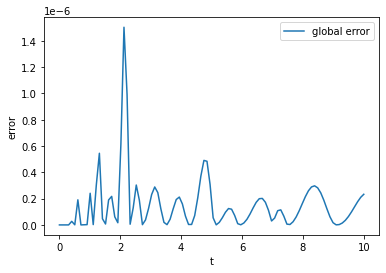

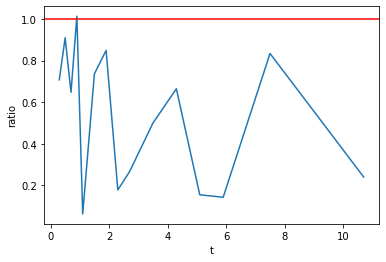

0.0
0.0
0.0
2.942091015256665e-14
1.8821832981075204e-11
2.7069790853317954e-11
2.6256774532384952e-11
2.1588897336499713e-11
2.7597127916223485e-09
1.8192220507806667e-09
1.051617348757361e-09
6.195417512344648e-10
5.592651966535023e-09
2.893651998570057e-09
1.5364942790307978e-09
8.78312408914006e-10
1.5465032934813827e-09
7.830806367931098e-10
4.181083430865318e-10


In [5]:
t_span_2 = [0, 10]
y0_2 = [1]

def model2(t, y):
    return [-2*t*y**2]

def solution2(t):
    return [1/(1+x**2) for x in t]

experiment(model2, y0_2, t_span_2, solution2)

tolerance= 1e-06
Monitor8
alpha values [0.9999999999999998, 1.0, 0.49999999999999994, 0.4999999999999999, 0.5000000000000003, 0.5000000000000001, 1.0000000000000002, 0.5]
beta values [0.9999999999999998, 1.9999999999999998, 1.0000000000000002, 2.0000000000000004, 1.999999999999999, 1.0, 2.0, 0.5]
n_steps 12
n_successful_steps 9


Monitor10
alpha values [0.9999999999999994, 1.9999999999999984, 2.0000000000000004, 0.9999999999999998, 1.0000000000000007, 0.9999999999999999, 1.0]
beta values [1.9999999999999996, 2.0000000000000013, 3.9999999999999996, 3.9999999999999956, 4.000000000000001, 3.999999999999999, 3.9999999999999982, 4.000000000000003, 2.0, 4.0, 1.0]
n_steps 0
n_successful_steps 0

integration complete


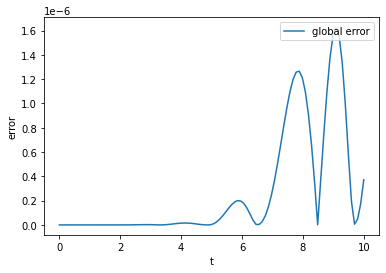

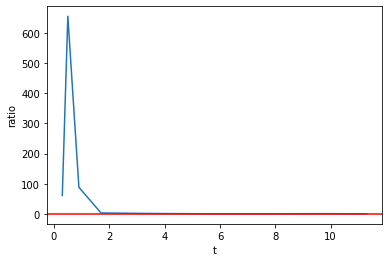

0.0
0.0
0.0
2.220446049250313e-16
2.220446049250313e-16
2.220446049250313e-16
1.84297022087776e-14
7.847056338050606e-12
1.5584866730478097e-11
2.1224799695573893e-11
5.698876037740774e-09
6.094458271377334e-09


In [6]:
t_span_3 = [0, 10]
y0_3 = [1]

def model3(t, y):
    return [(1/4)*y*(1 - y/20)]

def solution3(t):
    return [20 / ( 1 + 19 * exp(-x/4) ) for x in t]

experiment(model3, y0_3, t_span_3, solution3)

tolerance= 1e-06
Monitor8
alpha values [0.5, 1.0, 2.0, 1.9999999999999978, 4.000000000000001, 0.5000000000000006, 3.9999999999999956, 1.0000000000000044, 0.4999999999999978, 4.000000000000018, 1.0000000000000089, 3.999999999999929, 1.9999999999999645, 2.000000000000142, 1.0000000000000355, 4.000000000000284, 0.5000000000000089, 0.4999999999999645, 0.9999999999999645, 0.49999999999999556, 0.9999999999999911]
beta values [0.4999999999999999, 1.0000000000000002, 2.0, 0.24999999999999994, 1.0, 0.5000000000000006, 0.5, 1.9999999999999978, 1.000000000000001, 0.2500000000000003, 2.000000000000009, 2.0000000000000178, 1.0000000000000089, 1.9999999999999822, 1.9999999999999645, 2.000000000000142, 2.000000000000071, 0.5000000000000089, 0.2499999999999989, 0.4999999999999645, 0.9999999999999645, 0.9999999999999956, 0.25000000000000444, 0.24999999999998224, 1.0000000000000355, 0.9999999999999911]
n_steps 769
n_successful_steps 460


Monitor10
alpha values [0.9999999999999911, 1.9999999999999978, 2

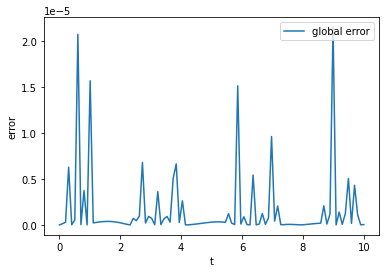

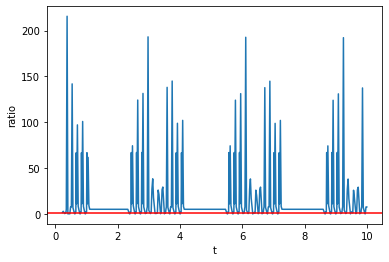

0.0
0.0
0.0
1.1079522188595092e-08
1.3444128893480567e-08
9.96010997222907e-06
8.381074773633479e-07
2.401504264337717e-07
6.883359371379072e-08
2.5326011510173885e-08
2.3129158865931032e-08
1.5967314730191973e-05
4.5747604364709815e-06
1.3107332783035552e-06
3.7557293608436737e-07
1.0764547792030399e-07
3.088382916072163e-08
3.097794154527378e-08
3.22757117698913e-08
2.2066176482815614e-05
6.32213006157567e-06
3.3839924645784336e-06
1.8113207346237559e-06
9.695302165546593e-07
5.189522215287568e-07
2.777752002858236e-07
7.963894455009779e-08
2.28727482509683e-08
3.8640409871781856e-08
4.109014706266123e-08
2.7782271445953022e-05
7.959833990489606e-06
4.260592230576066e-06
2.280530798648428e-06
1.2206802864067612e-06
6.533831868882345e-07
3.4973093088197515e-07
1.0026613583846711e-07
2.8793907036472888e-08
4.640751971596302e-08
4.883639470598666e-08
3.2709129480279486e-05
9.371415481962408e-06
5.016157375026253e-06
2.684955695331226e-06
1.437153351546705e-06
7.69252885834959e-07
4.1175

In [7]:
t_span_4 = [0, 10]
y0_4 = [0]

def model4(t, y):
    return [100 * (sin(t) - y)]
    # return [10 * (sin(t) - y)]

def solution4(t):
    return [( 100 * ( exp(-100 * x) - cos(x) ) +  10000 * sin(x) ) / 10001 for x in t]
    # return [( 10 * ( exp(-10 * x) - cos(x) ) +  100 * sin(x) ) / 101 for x in t]

experiment(model4, y0_4, t_span_4, solution4)

tolerance= 1e-06
Monitor8
alpha values [0.9999999999999998, 1.0, 2.0, 1.9999999999999978, 1.0000000000000007, 1.0000000000000022, 0.9999999999999978, 0.5, 0.5000000000000006, 0.9999999999999989, 2.000000000000009, 0.4999999999999978, 1.0000000000000044, 1.9999999999999645, 0.5000000000000089]
beta values [0.9999999999999994, 1.0000000000000002, 0.5, 1.999999999999999, 1.0, 0.5000000000000006, 0.9999999999999978, 2.0000000000000044, 1.0000000000000022, 2.0, 1.9999999999999978, 0.4999999999999978, 2.000000000000009, 1.9999999999999956, 1.9999999999999645, 1.000000000000001, 0.5000000000000089, 0.9999999999999956]
n_steps 268
n_successful_steps 185


Monitor10
alpha values [0.9999999999999911, 1.9999999999999984, 2.0000000000000004, 3.9999999999999956, 2.0000000000000013, 4.000000000000004, 2.000000000000009, 1.9999999999999867, 1.0, 2.0, 1.0000000000000022, 4.000000000000018, 1.9999999999999911, 1.9999999999999645, 2.0000000000000355, 1.0000000000000355, 3.999999999999929, 2.000000000000

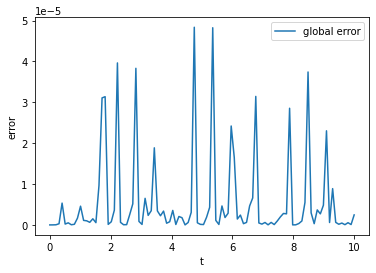

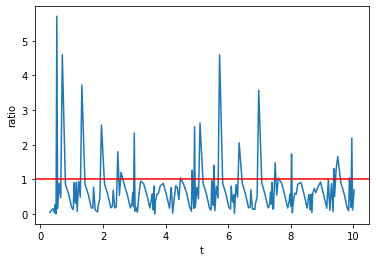

0.0
0.0
0.0
4.6346482207582085e-11
9.665368705391586e-08
1.242439469084644e-07
1.2820613748409926e-07
1.2109618374722686e-07
1.0756712942594504e-07
9.350560614684866e-08
7.214863173565789e-08
5.951575499096862e-08
5.249443235655349e-08
4.862055114074337e-08
5.6101149059628597e-08
9.738801720615697e-08
1.2865211851398328e-07
1.4375013468459485e-07
1.5005281683855287e-07
1.4329762132447854e-07
1.2801791249295036e-07
1.1139902356127607e-07
8.566201459281331e-08
7.033474247464255e-08
6.17772402122796e-08
5.679084047471861e-08
6.503410876490534e-08
1.0658809701524774e-07
1.407179779366885e-07
1.581670519001932e-07
1.493785730666275e-07
1.343160198619131e-07
1.0099598979351754e-07
8.897725556344938e-08
7.271551893950345e-08
6.359849447079569e-08
5.8030258376362553e-08
6.595620893889986e-08
1.0453167487156634e-07
1.3786675179261465e-07
1.557667983487221e-07
1.4440054330044916e-07
1.307819219587003e-07
1.1421067225292347e-07
8.728803813085051e-08
7.100082299871247e-08
6.183412981641823e-08
5.5

In [8]:
t_span_5 = [0, 10]
y0_5 = [2]

def model5(t, y):
    return [(15 * cos(10 * t))/y]

def solution5(t):
    return [sqrt(3*sin(10*x) + 4) for x in t]

experiment(model5, y0_5, t_span_5, solution5)

tolerance= 1e-06
Monitor8
alpha values [0.9999999999999998, 1.0, 0.4999999999999997, 0.5000000000000003, 1.0000000000000007, 0.5]
beta values [0.9999999999999994, 1.0000000000000002, 2.0000000000000004, 2.0000000000000013, 1.999999999999999, 1.0, 2.0]
n_steps 16
n_successful_steps 14


Monitor10
alpha values [0.9999999999999994, 1.9999999999999984, 2.0000000000000004, 2.0, 1.0000000000000007, 2.0000000000000013, 0.9999999999999989, 1.9999999999999978, 1.0]
beta values [1.999999999999999, 2.0, 2.0000000000000013, 3.9999999999999956, 4.000000000000001, 4.000000000000003, 1.9999999999999978]
n_steps 0
n_successful_steps 0

integration complete


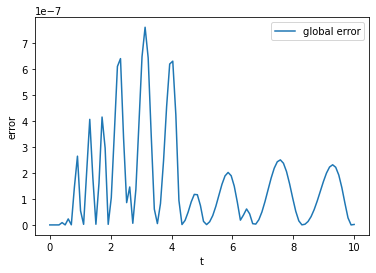

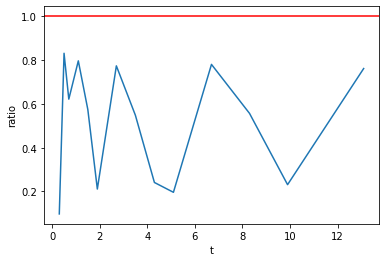

0.0
0.0
0.0
2.220446049250313e-16
6.661338147750939e-16
5.551115123125783e-16
8.881784197001252e-16
7.771561172376096e-16
9.992007221626409e-16
7.771561172376096e-16
5.551115123125783e-16
4.440892098500626e-16
4.163336342344337e-16
5.273559366969494e-16
4.0245584642661925e-16
4.163336342344337e-16
3.191891195797325e-16


In [9]:
t_span_6 = [0, 10]
y0_6 = [1]

def model6(t, y):
    return [-y/(t+1)]

def solution6(t):
    return [1/(x+1) for x in t]

experiment(model6, y0_6, t_span_6, solution6)

tolerance= 1e-06
Monitor8
alpha values [0.9999999999999998, 1.0, 0.49999999999999994, 0.4999999999999999, 0.5000000000000003, 1.0000000000000004, 0.9999999999999989]
beta values [0.9999999999999996, 1.9999999999999998, 1.0000000000000002, 2.0000000000000004, 1.999999999999999, 1.0, 2.0000000000000013, 2.0, 1.000000000000001, 1.9999999999999978]
n_steps 24
n_successful_steps 15


Monitor10
alpha values [0.9999999999999994, 1.9999999999999984, 2.0000000000000004, 0.9999999999999998, 1.0000000000000007, 2.000000000000001, 2.0, 2.000000000000002, 1.9999999999999978]
beta values [1.999999999999999, 2.0000000000000013, 3.9999999999999996, 3.9999999999999956, 4.000000000000001, 3.999999999999999, 2.0, 4.000000000000003, 4.0, 2.000000000000002, 1.9999999999999978, 4.000000000000007]
n_steps 0
n_successful_steps 0

integration complete


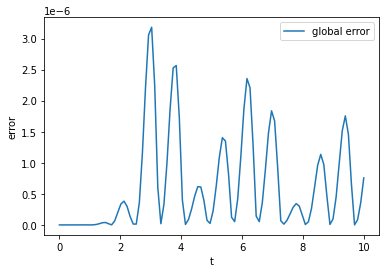

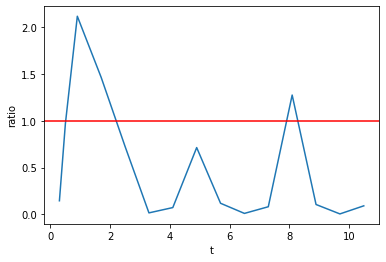

0.0
0.0
0.0
0.0
3.3306690738754696e-16
4.9960036108132044e-15
2.7789021084245746e-12
2.624789274818795e-12
1.3855583347321954e-13
2.86332069165951e-12
4.543976306337072e-12
4.091282868046164e-12
2.0230483954719602e-12
2.985389713217046e-13
1.5679124665268773e-12
1.2633227797209656e-12
1.719180353632055e-13
1.7235379790037086e-12


In [10]:
t_span_7 = [0, 10]
y0_7 = [1]

def model7(t, y):
    alpha = 0.1
    return [ -alpha*y - exp(-alpha*t)*sin(t)]

def solution7(t):
    alpha = 0.1
    return [exp(-alpha*x)*cos(x) for x in t]

experiment(model7, y0_7, t_span_7, solution7)

tolerance= 1e-06
Monitor8
alpha values [0.9999999999999998, 1.0, 0.4999999999999999, 0.5000000000000003, 1.0000000000000007, 0.4999999999999997]
beta values [0.9999999999999994, 1.0000000000000002, 2.0000000000000004, 1.999999999999999, 1.0, 2.0000000000000013, 2.0]
n_steps 15
n_successful_steps 13


Monitor10
alpha values [0.9999999999999994, 1.9999999999999984, 2.0000000000000004, 2.0000000000000013, 1.0000000000000007, 0.9999999999999989, 1.9999999999999978, 2.000000000000002]
beta values [1.9999999999999996, 2.0000000000000013, 3.9999999999999956, 4.000000000000001, 1.9999999999999978, 4.000000000000003, 2.0, 4.000000000000007]
n_steps 0
n_successful_steps 0

integration complete


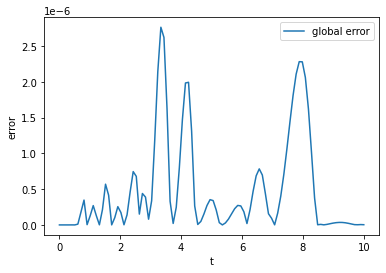

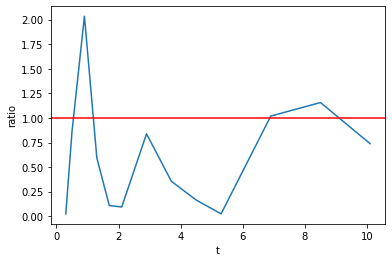

0.0
0.0
0.0
3.574918139293004e-14
1.4243883850184602e-11
4.79597200842008e-09
4.307060985642153e-09
2.9022824143964954e-09
1.7385802797420524e-09
1.0690347473918393e-07
4.309660739387766e-08
1.304461516582478e-08
3.510626456204591e-09
1.2354782530366037e-07
1.055519582848774e-08
6.770797256194783e-10


In [11]:
t_span_11 = [0, 10]
y0_11 = [1]

def model11(t, y):
    return [-2*y + t]

def solution11(t):
    return [1/4 * (-1 + 5 * exp(-2 * x) + 2 * x) for x in t]

experiment(model11, y0_11, t_span_11, solution11)

In [12]:
# THE PROBLEMS BELOW CANNOT BE DONE YET
# CANNOT BE DONE AS MY CURRENT rk6 does not handle a vector for the ys
### ======================================================================


# Jeff cash test set first one

# t_span_8 = [0, 10]
# eps = 0.1
# a = exp(-1/eps)
# y0_8 = [1, a/(eps*(-1+a))]

# def model8(t, y):
#     return [y[1], y[0]/eps]

# def solution8(t):
#     # THE experiment method calculates error on "computed[0]"
#     # so we can only verify the error of y[0] there
#     return [(1-exp(x/eps)*a)/(1-a) for x in t]

# experiment(model8, y0_8, t_span_8, solution8)

# ## the results were extremely bad. So i wanted to see the solution
# plt.figure()
# plt.plot(t_span_8, solution8(t_span_8))



In [13]:
# Jeff cash test set second one
# t_span_9 = [0, 10]
# eps = 0.1
# y0_9 = [1, -1/sqrt(eps)]

# def model9(t, y):
#     return [y[1], (y[0] + y[0]**2 - exp(-2*t/sqrt(eps)))/eps]

# def solution9(t):
#     # THE experiment method calculates error on "computed[0]"
#     # so we can only verify the error of y[0] there
#     return [exp(-x/sqrt(eps)) for x in t]

# experiment(model9, y0_9, t_span_9, solution9)

In [14]:
# Wolfram Alpha first problem

# t_span_10 = [0, 10]
# y0_10 = [1, 2]

# def model10(t, y):
#     return [y[1], -3*y[0] + 2*cos(4*t)]

# def solution10(t):
#     # THE experiment method calculates error on "computed[0]"
#     # so we can only verify the error of y[0] there
#     s = sqrt(3)
#     return [(26*s*sin(s*x) - 6*cos(4*x) + 45*cos(s*x))/39 for x in t]

# experiment(model10, y0_10, t_span_10, solution10)